In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on 22 May 2019

@author: M Roux
"""


import matplotlib.pyplot as plt
from skimage import data, filters
from skimage import io as skio
from scipy import ndimage
import mrlab as mr

# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

In [2]:

def tophat(im,rayon):
    se=morpho.square(rayon)
    ero=morpho.erosion(im,se)
    dil=morpho.dilation(ero,se)
    tophat=im-dil
    return tophat

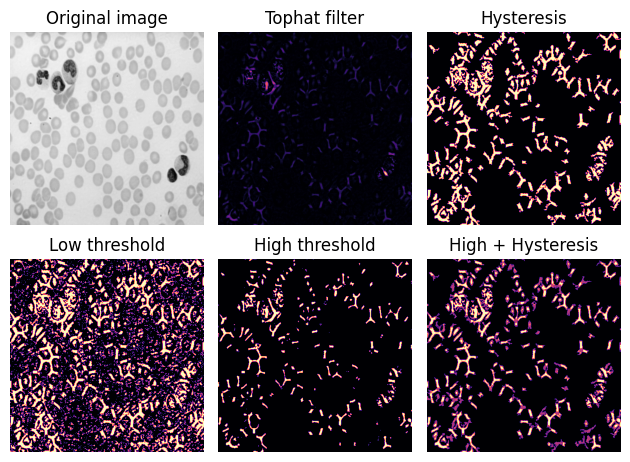

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3)

ima = skio.imread('images\cell.tif');
rayon=9
top=tophat(ima,rayon)

low = 2
high = 9


lowt = (top > low).astype(int)
hight = (top > high).astype(int)
hyst = filters.apply_hysteresis_threshold(top, low, high)


ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(top, cmap='magma')
ax[0, 1].set_title('Tophat filter')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight, cmap='magma')
ax[1, 1].set_title('High threshold')

ax[0, 2].imshow(hyst, cmap='magma')
ax[0, 2].set_title('Hysteresis')

ax[1, 2].imshow(hight + hyst, cmap='magma')
ax[1, 2].set_title('High + Hysteresis')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()